In [6]:
#!pip install --upgrade pip --quiet
#!pip install pandas --quiet
#!pip install seaborn --quiet
#!pip install matplotlib --quiet
#!pip install scipy --quiet
#!pip install numpy --quiet
#!pip install scikit-learn --quiet
#!pip install pydeseq2 --quiet
#!pip install pickle --quiet

In [7]:
import gseapy.plot
import pandas
import pandas as pd

Dados obtidos por conversão das variáveis em R.
Usei o packages TCGA BioLinks para transferir e depois exportei.

A lógica
```r
write_csv(seqdata, 'seqdata.csv') # Para excluir os rownames e manter os nomes do gene
write_csv(meta, 'meta.csv', rownames = FALSE) # Para manter o barcode
```

In [8]:
seqdata = pandas.read_csv('./dataset/seqdata.csv')
seqdata = seqdata.rename(columns={'Unnamed: 0':'Genes'})
seqdata = seqdata.set_index('Genes')
seqdata.head()

,TCGA-38-7271-01A-11R-2039-07,TCGA-55-7914-01A-11R-2170-07,TCGA-95-7043-01A-11R-1949-07,TCGA-73-4658-01A-01R-1755-07,TCGA-86-8076-01A-31R-2241-07,TCGA-55-7726-01A-11R-2170-07,TCGA-44-6147-01A-11R-A278-07,TCGA-50-5932-01A-11R-1755-07,TCGA-44-2661-01A-01R-1107-07,TCGA-86-7954-01A-11R-2187-07,...,TCGA-50-5946-02A-11R-2090-07,TCGA-86-7713-01A-11R-2066-07,TCGA-86-8073-01A-11R-2241-07,TCGA-44-2662-01B-02R-A277-07,TCGA-MN-A4N4-01A-12R-A24X-07,TCGA-53-7626-01A-12R-2066-07,TCGA-62-A46O-01A-11R-A24H-07,TCGA-44-A47G-01A-21R-A24H-07,TCGA-55-6969-01A-11R-1949-07,TCGA-55-6969-11A-01R-1949-07
Genes,,,,,,,,,,,,,,,,,,,,,
TSPAN6,1536,2936,1475,3659,3269,1188,2178,4545,4558,9079,...,5188,8522,3418,667,3365,3249,5948,2272,2233,513
TNMD,0,0,0,188,0,0,4,0,0,3,...,0,0,0,10,0,0,0,0,0,1
DPM1,765,1447,1275,981,1540,1564,1430,1557,2089,3519,...,2778,2548,2937,554,2244,1969,1174,851,2803,754
SCYL3,510,827,373,456,1171,269,1139,1185,1025,1630,...,1031,2384,1008,716,777,1345,628,565,940,350
C1orf112,172,241,172,158,318,219,434,322,315,1097,...,969,1790,592,619,451,427,572,199,647,73


In [9]:
meta = pandas.read_csv('./dataset/meta.csv')
meta = meta.set_index('barcode')
meta.head()

,gender,expr
barcode,,
TCGA-38-7271-01A-11R-2039-07,female,NaN
TCGA-55-7914-01A-11R-2170-07,female,TRU
TCGA-95-7043-01A-11R-1949-07,female,prox.-prolif.
TCGA-73-4658-01A-01R-1755-07,female,prox.-inflam
TCGA-86-8076-01A-31R-2241-07,male,NaN


In [10]:
meta.isna().any()

gender    False
expr       True
dtype: bool

In [11]:
# Remover NAs do expr. subtype
meta_clean = meta.dropna(how='any')

if len(meta_clean) == 248:
    print(f'data set de subtipo de expressão contém 248 valores como esperado, com tamanho {len(meta_clean)}')
    
meta_clean.head()

data set de subtipo de expressão contém 248 valores como esperado, com tamanho 248


,gender,expr
barcode,,
TCGA-55-7914-01A-11R-2170-07,female,TRU
TCGA-95-7043-01A-11R-1949-07,female,prox.-prolif.
TCGA-73-4658-01A-01R-1755-07,female,prox.-inflam
TCGA-55-7726-01A-11R-2170-07,female,prox.-inflam
TCGA-44-6147-01A-11R-A278-07,female,TRU


In [12]:
# Filtrar seqdata com base no filtro
seqdata_clean = seqdata[meta_clean.index] # Não é preciso validar pois as colunas já estão pelo nome

if seqdata_clean.shape[1] == 248:
    print(f'data set de dados de expressão corretamente filtrado, com tamanho {seqdata_clean.shape[1]}')


data set de dados de expressão corretamente filtrado, com tamanho 248


In [13]:
smoke_status = pandas.read_csv('./dataset/fumo.csv')

smoke_status = smoke_status.rename(columns={
    'data.paper_Smoking.Status' : 'Smoke Habits',
    'data.years_smoked' : 'Years Smoked'})

smoke_status.drop(columns=['Unnamed: 0'], inplace=True)
smoke_status['barcode'] = meta.index

# Filtramos por Smoke Habits
smoke_status.isna().any()
smoke_status_clean = smoke_status[(smoke_status['Smoke Habits'].notna()) & (smoke_status['Smoke Habits'] != '[Not Available]')]
smoke_status_clean = smoke_status_clean[['barcode', 'Smoke Habits', 'Years Smoked']]
smoke_status_clean.head()

,barcode,Smoke Habits,Years Smoked
1,TCGA-55-7914-01A-11R-2170-07,Current smoker,NaN
2,TCGA-95-7043-01A-11R-1949-07,Current reformed smoker for < or = 15 years,39.0
3,TCGA-73-4658-01A-01R-1755-07,Current reformed smoker for > 15 years,NaN
5,TCGA-55-7726-01A-11R-2170-07,Current reformed smoker for > 15 years,24.0
6,TCGA-44-6147-01A-11R-A278-07,Current reformed smoker for > 15 years,4.0


In [14]:
vital = pandas.read_csv('./dataset/vital.csv')

vital.rename(columns={'data.barcode' : 'barcode', 'data.vital_status' : 'Vital Status'}, inplace=True)

vital_vs_smoke = pandas.merge(
    smoke_status_clean,
    vital,
    on = 'barcode',
    how = 'inner'
)

vital_vs_smoke = vital_vs_smoke[['barcode', 'Smoke Habits', 'Years Smoked', 'Vital Status']]
vital_vs_smoke['Smoke Habits'] = vital_vs_smoke['Smoke Habits'].replace(
    {'Current reformed smoker for > 15 years' : 'EX > 15 y',
    'Current reformed smoker for < or = 15 years' : 'EX <= 15 y',
    'Current smoker': 'Smokes',
    'Lifelong Non-smoker': 'Never smoked'
})
vital_vs_smoke

,barcode,Smoke Habits,Years Smoked,Vital Status
0,TCGA-55-7914-01A-11R-2170-07,Smokes,NaN,Dead
1,TCGA-95-7043-01A-11R-1949-07,EX <= 15 y,39.0,Dead
2,TCGA-73-4658-01A-01R-1755-07,EX > 15 y,NaN,Dead
3,TCGA-55-7726-01A-11R-2170-07,EX > 15 y,24.0,Alive
4,TCGA-44-6147-01A-11R-A278-07,EX > 15 y,4.0,Alive
...,...,...,...,...
232,TCGA-78-7153-01A-11R-2039-07,EX <= 15 y,40.0,Alive
233,TCGA-38-4628-01A-01R-1206-07,Never smoked,NaN,Dead
234,TCGA-86-7713-01A-11R-2066-07,Never smoked,NaN,Alive
235,TCGA-44-2662-01B-02R-A277-07,EX > 15 y,28.0,Alive


In [15]:
stage = pandas.read_csv('./dataset/stage.csv')
stage.drop(columns=['Unnamed: 0'], inplace=True)

stage = stage.rename(columns={'data$paper_Tumor.stage' : 'Tumor Stage'})

stage['barcode'] = meta.index

print(f'encontrados {stage.iloc[:, 0].isna().sum()} valores omissos',
           'foi criada uma versão filtrada')

stage_clean = stage.dropna(how='any')
stage_clean[stage_clean['barcode'].isin(meta.index)]
stage_clean




encontrados 352 valores omissos foi criada uma versão filtrada


,Tumor Stage,barcode
1,Stage IIA,TCGA-55-7914-01A-11R-2170-07
2,Stage IA,TCGA-95-7043-01A-11R-1949-07
3,Stage IB,TCGA-73-4658-01A-01R-1755-07
5,Stage IA,TCGA-55-7726-01A-11R-2170-07
6,Stage IA,TCGA-44-6147-01A-11R-A278-07
...,...,...
588,Stage IIA,TCGA-50-5055-01A-01R-1628-07
589,Stage IIB,TCGA-38-4628-01A-01R-1206-07
591,Stage IB,TCGA-86-7713-01A-11R-2066-07
593,Stage IB,TCGA-44-2662-01B-02R-A277-07


<Axes: xlabel='Vital Status'>

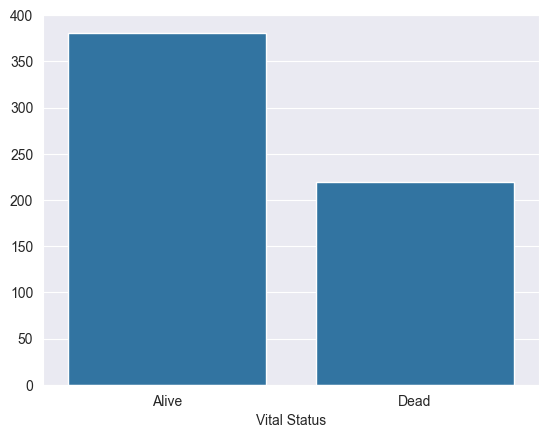

In [16]:
"""
Gráficos a correlacionar:

- smoke status com vital status?
- vital status vs stage?
"""
import seaborn
from matplotlib import pyplot, pyplot as plt

# Equivalente a table(dados)
vital_status = vital['Vital Status'].value_counts()
#vital_status

seaborn.barplot(x = vital_status.index, y = vital_status.values)

<Axes: xlabel='Smoke Habits'>

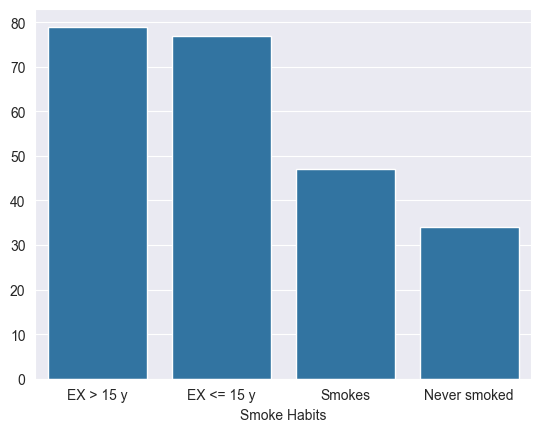

In [17]:
smoke_habit = smoke_status_clean['Smoke Habits'].value_counts()
smoke_habit = smoke_habit.rename({
    'Current reformed smoker for > 15 years': 'EX > 15 y',
    'Current reformed smoker for < or = 15 years': 'EX <= 15 y',
    'Current smoker' : 'Smokes',
    'Lifelong Non-smoker' : 'Never smoked',
})

seaborn.barplot(x = smoke_habit.index, y = smoke_habit.values)

<Axes: xlabel='gender'>

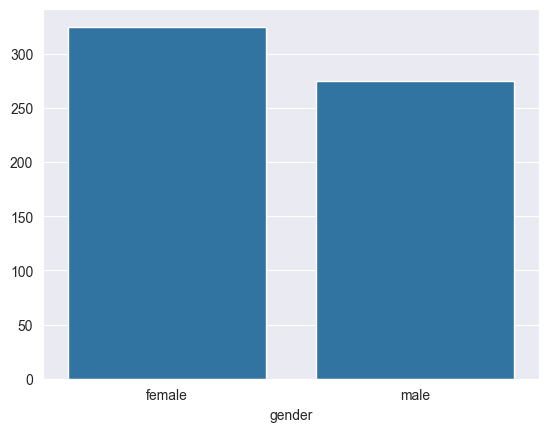

In [18]:
gender = meta['gender'].value_counts()
seaborn.barplot(x = gender.index, y = gender.values)

Estatística de teste:2.954414510442226
Graus de liberdade:3
Valor de prova:0.3987070944866199
Para alfa = 0.05:
Não é plausível considerar correlação


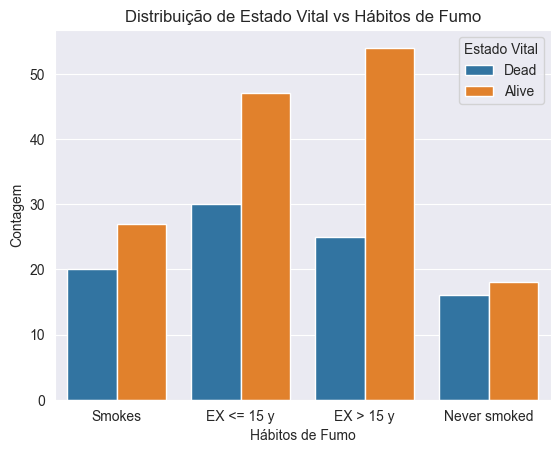

In [19]:
# Corre fumo com vital
import scipy.stats as stats

contingency_table = pandas.crosstab(vital_vs_smoke['Vital Status'], vital_vs_smoke['Smoke Habits'])
alpha = 0.05
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Estatística de teste:{chi2}',
      f'Graus de liberdade:{dof}',
      f'Valor de prova:{p}',
      f'Para alfa = {0.05}:',
      sep = '\n')

# para 95% IC
if p < 0.05:
    print('É plausível considerar correlação')
    
else:
    print('Não é plausível considerar correlação')

seaborn.countplot(x='Smoke Habits', hue = 'Vital Status', data = vital_vs_smoke)
pyplot.title('Distribuição de Estado Vital vs Hábitos de Fumo')
pyplot.xlabel('Hábitos de Fumo')
pyplot.ylabel('Contagem')
pyplot.legend(title = 'Estado Vital')
pyplot.show()


    

# Expressão diferencial

In [45]:

# Pipeline
# https://pydeseq2.readthedocs.io/en/latest/auto_examples/plot_pandas_io_example.html
# https://pydeseq2.readthedocs.io/en/latest/auto_examples/plot_step_by_step.html

import pickle
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats


In [21]:

counts = seqdata_clean
counts_df = counts.T
metadata = meta_clean[['expr']]
# Verificar se dados correspondem
if (counts_df.index == meta_clean.index).all():
    print('dados correspondem corretamente')

genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
counts_df = counts_df[genes_to_keep]

inference = DefaultInference(n_cpus=8)



dados correspondem corretamente


In [32]:
"""
Credits to mousepixels: https://github.com/mousepixels/sanbomics_scripts/blob/main/PyDeseq2_DE_tutorial.ipynb
And PyDeSEQ2 documentation
"""

dds = DeseqDataSet(
    counts = counts_df,
    metadata = metadata,
    design_factors='expr',
    refit_cooks=True,
    inference = inference
)

dds.deseq2()


Fitting size factors...
... done in 0.72 seconds.

Fitting dispersions...
... done in 8.89 seconds.

Fitting dispersion trend curve...
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 8.77 seconds.

Fitting LFCs...
... done in 5.90 seconds.

Replacing 8916 outlier genes.

Fitting dispersions...
... done in 1.47 seconds.

Fitting MAP dispersions...
... done in 1.39 seconds.

Fitting LFCs...
... done in 1.23 seconds.



array([3372.65914221,    7.4057131 , 1505.15364385, ...,  251.43456146,
          5.3824793 ,   13.97993538])

In [24]:
# Guardar para acelerar o processo mais á frente com o load (estilo RDA/RDS)
# open("dds.pkl", "wb") as f:
#    pickle.dump(dds, f)
    
# 
#with open('dds.pkl', 'rb') as f:
#    pickle.load(f)

In [97]:
# Create a DeseqStats object using the given DESeq dataset (dds) and specified parameters
# alpha: significance level for testing (default 0.05)
# cooks_filter: whether to apply Cook's distance filtering to remove potential outliers
# independent_filter: whether to apply independent filtering to increase power by removing low count genes
# inference: specifies the type of statistical inference to use (e.g., 'parametric', 'non-parametric')
stat_res = DeseqStats(dds, alpha=0.05, cooks_filter=True, independent_filter=True, inference=inference)

# Run the Wald test for differential expression analysis on the DESeq dataset
# The Wald test is a parametric test used to determine if there is a significant difference in expression
# It calculates p-values and log fold changes for each gene in the dataset
stat_res.run_wald_test()

# Retrieve the results of the Wald test as a pandas DataFrame
# This DataFrame contains the results of the differential expression analysis, including:
# - log fold changes
# - p-values
# - adjusted p-values (corrected for multiple testing)
# - additional statistics and metadata for each gene
stat_res.summary()


Running Wald tests...
... done in 2.05 seconds.



Log2 fold change & Wald test p-value: expr prox.-inflam vs TRU
                    baseMean  log2FoldChange     lfcSE      stat  \
Genes                                                              
TSPAN6           3372.659142        0.055701  0.104359  0.533749   
TNMD                7.405713        1.198674  0.465215  2.576601   
DPM1             1505.153644        0.424534  0.086944  4.882840   
SCYL3             778.112463       -0.171164  0.076256 -2.244583   
C1orf112          373.207836        0.725551  0.097846  7.415237   
...                      ...             ...       ...       ...   
ENSG00000288667     1.368924        0.404061  0.983904  0.410671   
ENSG00000288669     0.200104        0.859831  0.967010  0.889165   
ENSG00000288670   251.434561       -0.166020  0.100246 -1.656119   
ENSG00000288674     5.382479       -0.612823  0.136808 -4.479424   
ENSG00000288675    13.979935       -0.184320  0.129677 -1.421377   

                       pvalue          padj  
Genes 

In [280]:
# Extracting the results DataFrame from the statistical results object
rdf = stat_res.results_df

# Print the initial number of genes present in the results DataFrame
# This provides a count of the total number of rows (genes) before filtering
print('Genes inicialmente presentes -->', len(rdf))  # Expected to be > 52310

# Apply filtering criteria to select significant genes:
# - Adjusted p-value (padj) < 0.05
# - Absolute value of log2 fold change (|log2FoldChange|) > 2
# - Base mean expression (baseMean) > 20
significant = rdf[(rdf.padj < 0.05) & (abs(rdf.log2FoldChange) > 2) & (rdf.baseMean > 20)]

# Print the number of genes that meet the differential expression criteria
# This gives an idea of the subset size that meets the specified thresholds
print(f'Genes mais diferencialmente expressos (log2FoldChange > 2, CPM > 20, padj < 0.05 -->', len(significant))  # Expected to be > 695

# Sort the significant genes by the adjusted p-value (padj) in ascending order
# This ensures that the most significant genes are at the top of the DataFrame
significant = significant.sort_values(by='padj')

# Display the top 100 genes based on the sorted DataFrame
# This returns the first 100 rows (genes) after sorting
significant_top_100 = significant.head(100)

# Print the indexes of the top 100 differentially expressed genes
# This provides a list of the most significant genes based on the filtering and sorting criteria
#print('Lista dos 100 genes mais diferencialmente expressos:', *significant_top_100.index, sep='\n')

# Optionally, you can uncomment the print statement above to see the list of top 100 genes


Genes inicialmente presentes --> 52310
Genes mais diferencialmente expressos (log2FoldChange > 2, CPM > 20, padj < 0.05 --> 279


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Genes,,,,,,
REG4,552.188893,-8.305037,0.493697,-16.822134,1.679970e-63,7.083763e-59
PGC,64508.062265,-5.745434,0.405785,-14.158810,1.647615e-45,2.315778e-41
FLJ22447,94.141414,3.580024,0.256470,13.958845,2.778992e-44,2.929475e-40
HMGCS2,286.930678,-5.596109,0.424343,-13.187688,1.033058e-39,3.350763e-36
UBE2C,1560.655059,2.290528,0.174120,13.154847,1.596068e-39,4.807128e-36
...,...,...,...,...,...,...
MYH16,34.674793,2.050282,0.239540,8.559260,1.135947e-17,1.429802e-15
MFAP5,430.741708,2.472335,0.289354,8.544325,1.292898e-17,1.612910e-15
ASPG,180.186045,-2.761728,0.323804,-8.529016,1.475984e-17,1.825113e-15


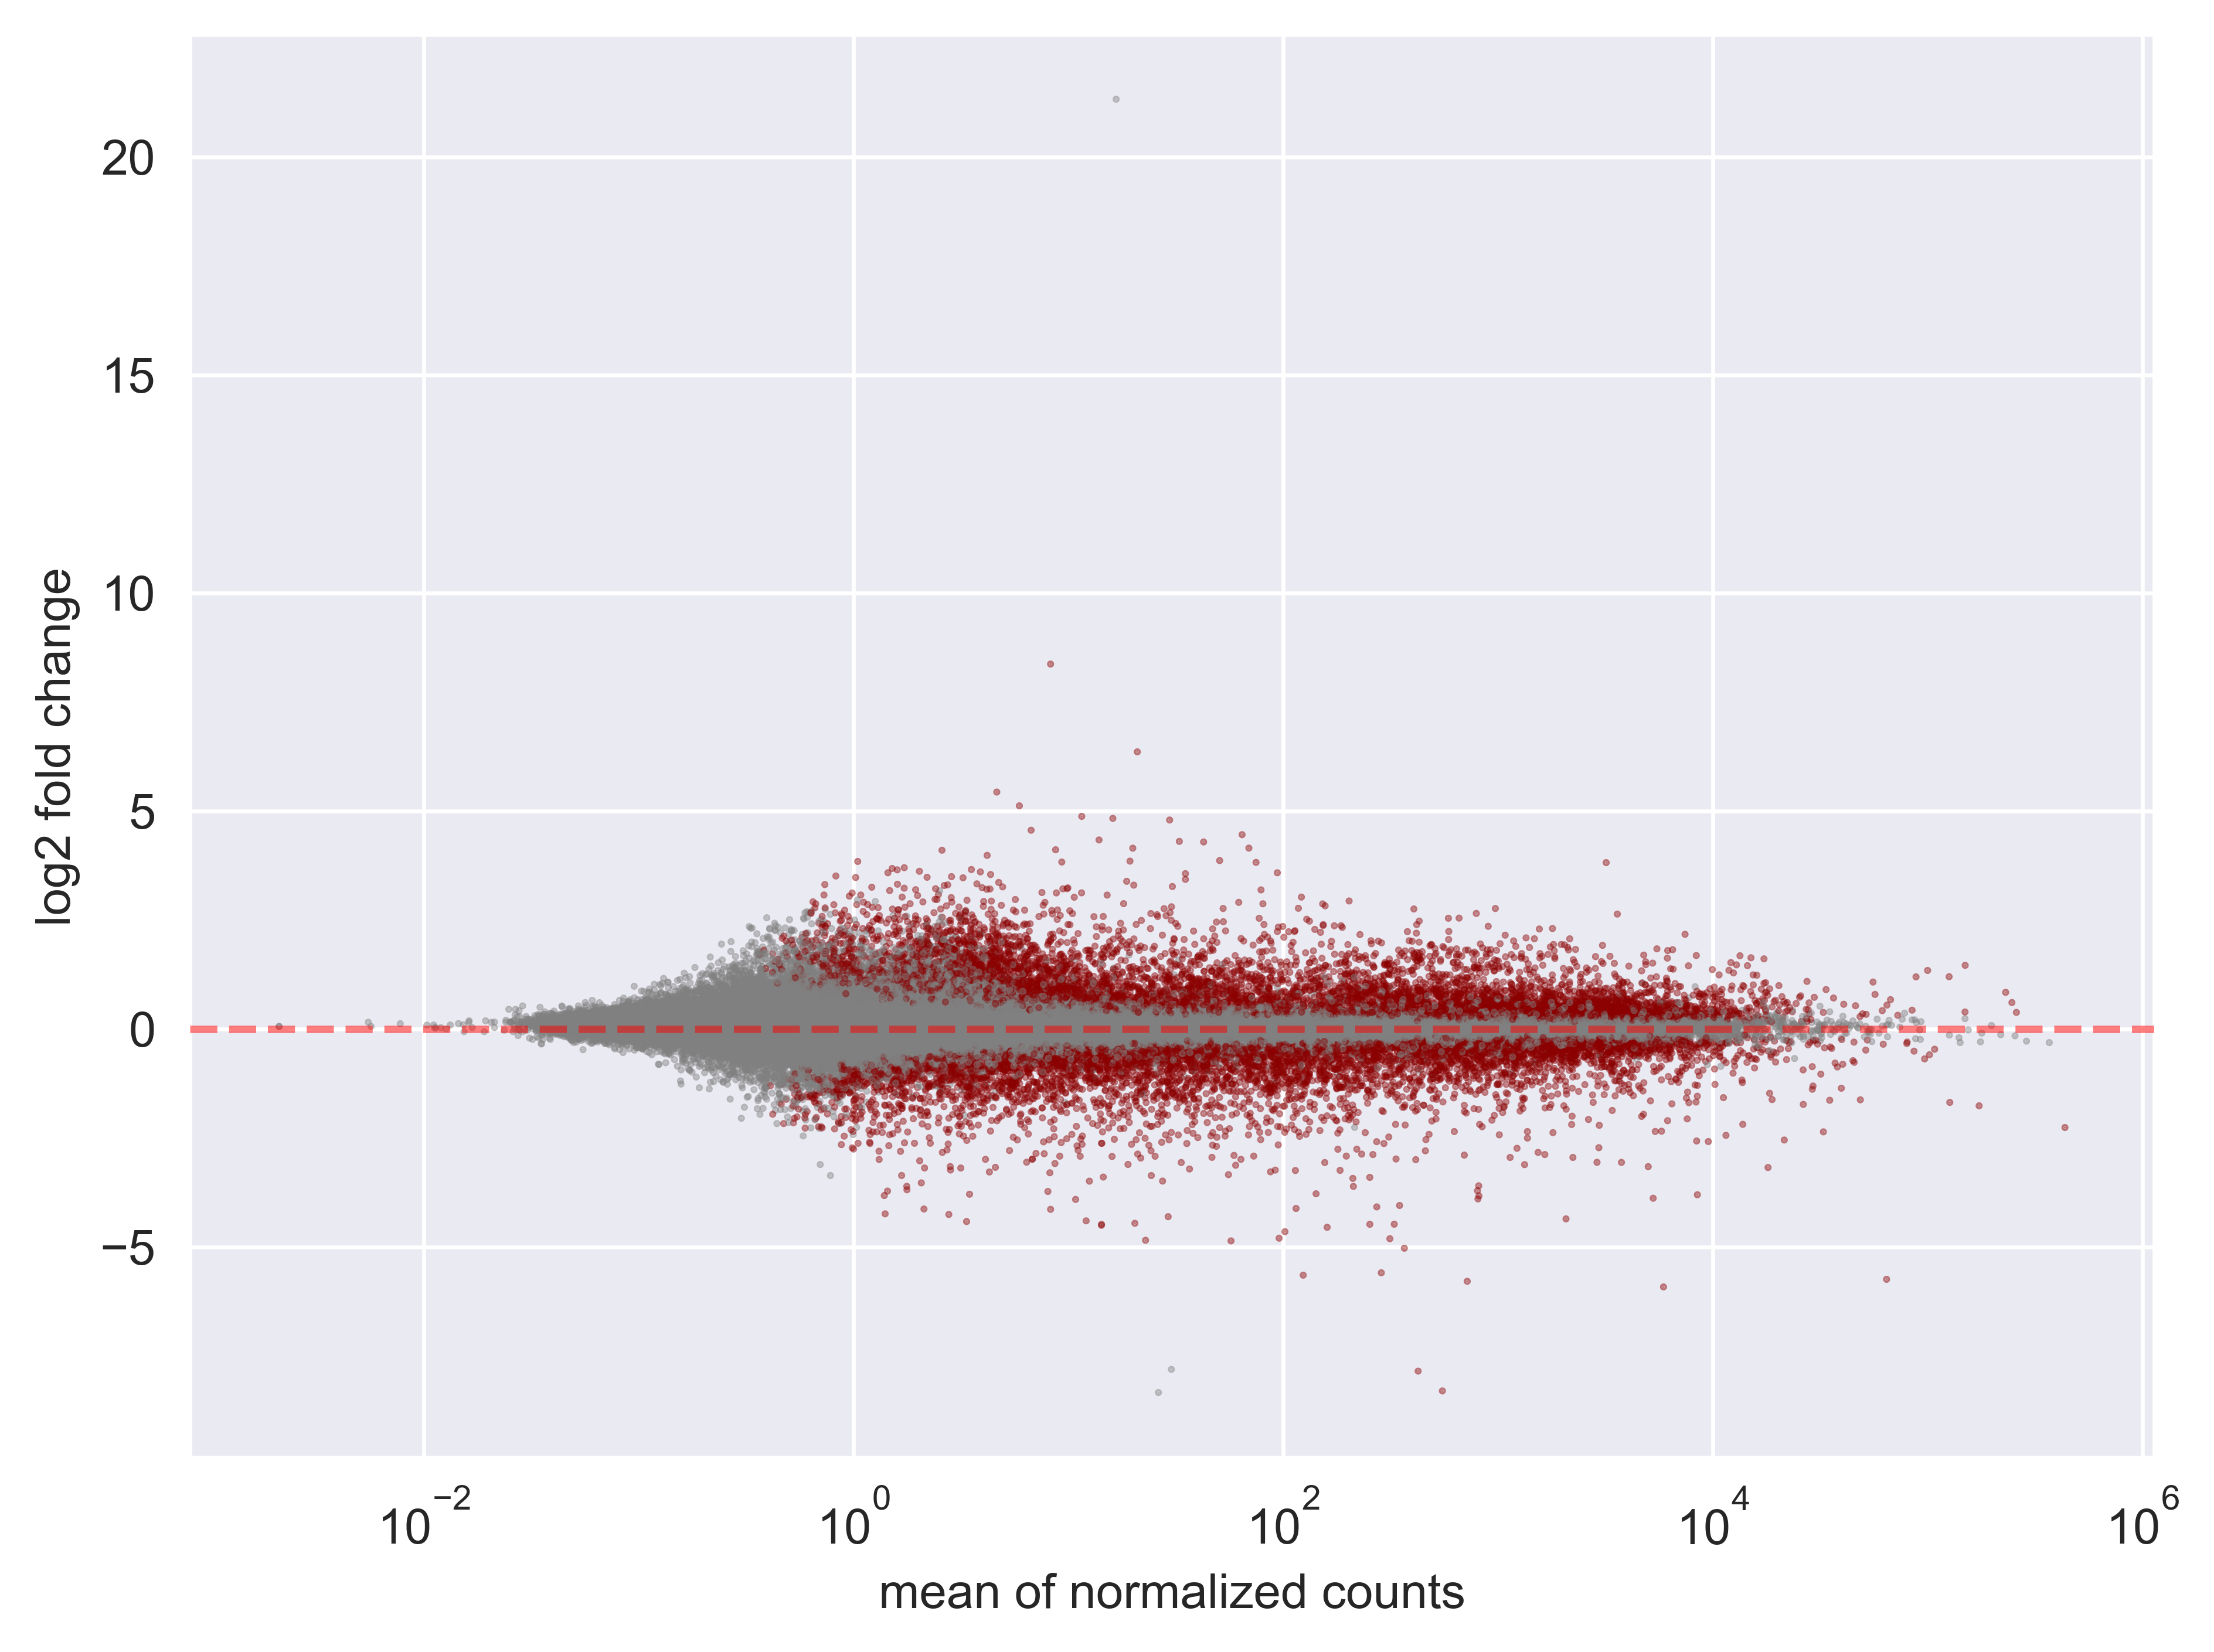

In [286]:
#MA Plot
stat_res.plot_MA()

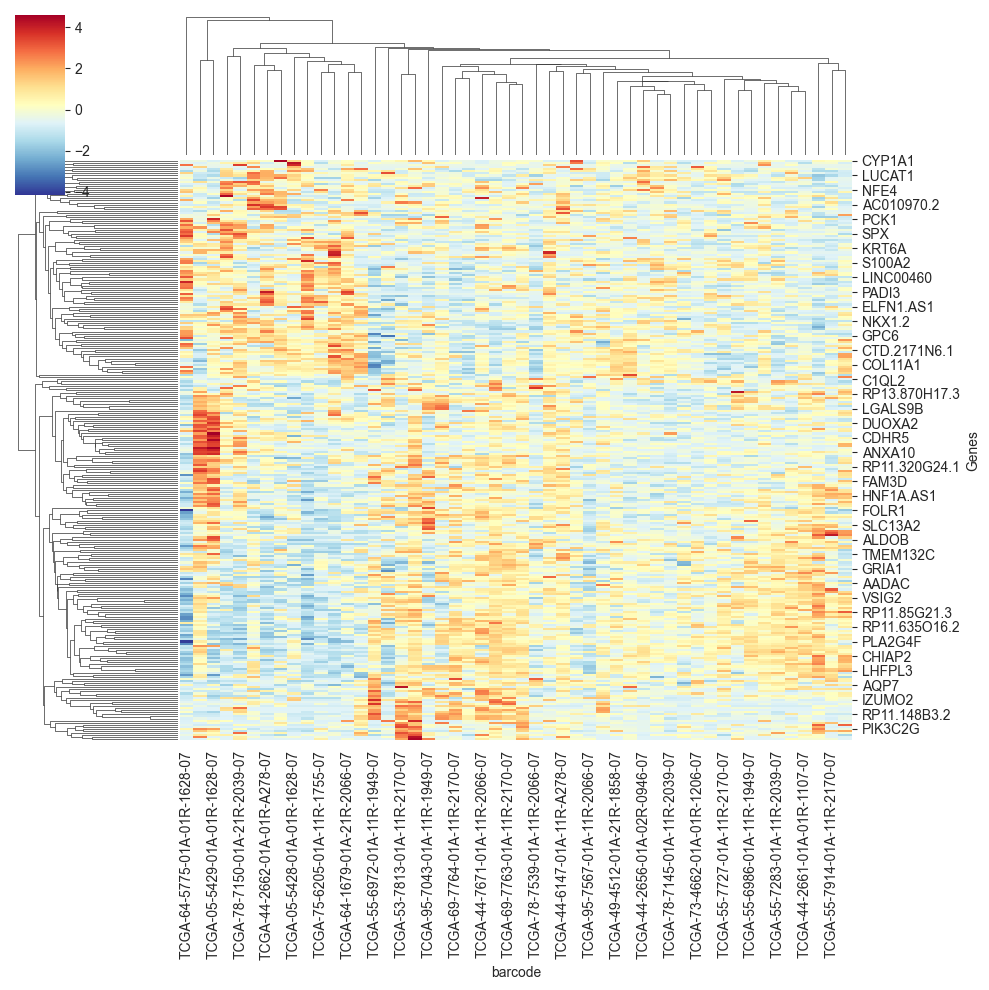

In [290]:
import numpy as np
import pandas as pd
import seaborn as sns

# Assuming 'dds' is a DESeqDataSet object with layers and observations (obs)

# Compute log-transformed counts and store them in a new layer 'logcounts'
# np.log1p(x) computes log(1 + x) which helps in managing zeros in the data
dds.layers['logcounts'] = np.log1p(dds.layers['normed_counts'])

# Display the 'logcounts' layer to verify the transformation
dds.layers['logcounts']

# Subset the DESeqDataSet to include only the first 50 rows and the significant indices
dds_sigs = dds[:50, significant.index]

# Sort the observations (obs) DataFrame of the subsetted data by the 'expr' column
filtered = dds_sigs.obs.sort_values(by='expr')

# Create a list of indices in the sorted order to use for reordering
flist = [index for index, row in filtered.iterrows()]

# Reorder the original DESeqDataSet 'dds' using the sorted indices and significant columns
dds_sigs_ordered = dds[flist, significant.index]

# Create a DataFrame for graphing with the log-transformed counts
# The DataFrame's index is the variable names (var_names)
# The DataFrame's columns are the observation names (obs_names)
grapher = pd.DataFrame(
    dds_sigs_ordered.layers['logcounts'].T,
    index=dds_sigs_ordered.var_names,
    columns=dds_sigs_ordered.obs_names
)

# Plot a clustered heatmap of the data using seaborn's clustermap function
# z_score=0 standardizes the rows (genes) by subtracting the mean and dividing by the standard deviation
# cmap='RdYlBu_r' sets the color map to a diverging palette from red to yellow to blue, reversed
sns.clustermap(grapher, z_score=0, cmap='RdYlBu_r')


In [312]:
# GSEA
#!pip install gseapy --quiet
import gseapy as gp
from gseapy.plot import gseaplot

ranking = rdf[['stat']].dropna().sort_values('stat', ascending=False)

pre_res = gp.prerank(rnk = ranking,
                     gene_sets= ['GO_Biological_Process_2021'],
                     seed = 6, permutation_num=100
                     )


2024-05-26 20:44:26,854 [WARNING] Duplicated values found in preranked stats: 0.06% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


[<Axes: xlabel='Gene Rank'>, <Axes: ylabel='Enrichment Score'>]

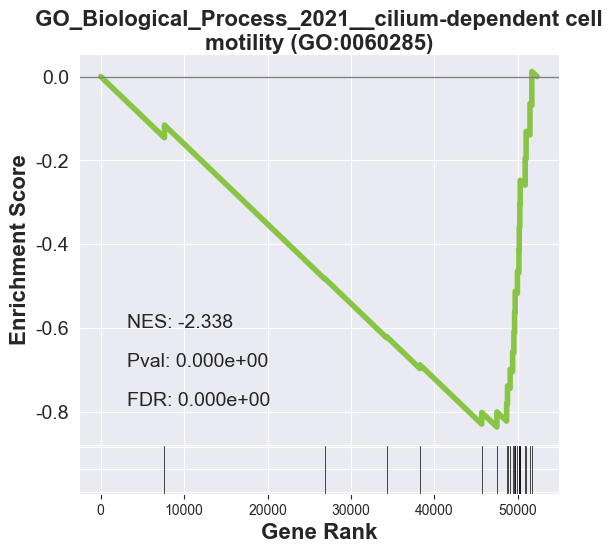

In [351]:
out = []

for term in list(pre_res.results):
    out.append(
        [term,
         pre_res.results[term]['fdr'],
         pre_res.results[term]['es'],
         pre_res.results[term]['nes']]
    )

out_df = pd.DataFrame(out, columns = ['Term', 'fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop=True)
i = out_df.sort_values('es').iloc[0].Term
gseaplot(term=i, **pre_res.results[i])

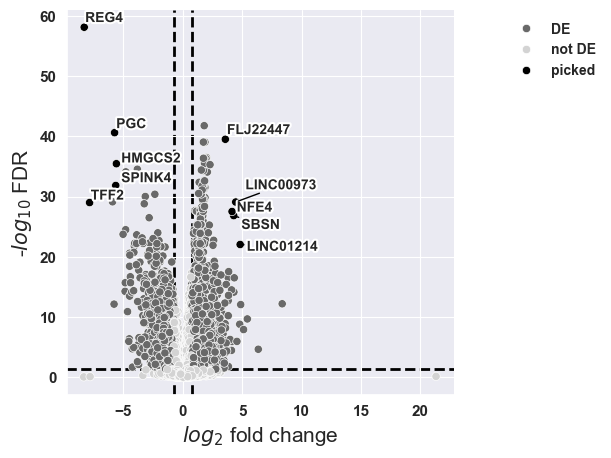

In [346]:
from sanbomics.plots import volcano

rdf_copy = rdf.copy()
rdf_copy['Symbol'] = rdf_copy.index
volcano(rdf_copy, symbol='Symbol')

# Clustering